In [ ]:
!pip install gym

In [2]:
import gym
import numpy as np

In [3]:
#Initialize environmennt
env = gym.make('CartPole-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [17]:
# Discretize the state space
def discretize_state(state):
    state_bins = np.array([np.linspace(env.observation_space.low[i], env.observation_space.high[i], num=10)
                           for i in range(env.observation_space.shape[0])])
    discretized_state = [np.digitize(state[i], state_bins[i]) - 1 for i in range(env.observation_space.shape[0])]
    return tuple(discretized_state)

# Initialize Q-table with arbitrary values
num_states = 10 ** env.observation_space.shape[0]  # Discretized state space
num_actions = env.action_space.n
Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

In [55]:
# Hyperparameters
num_episodes = 1000
max_steps_per_episode = 200
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount rate
epsilon_max = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995

In [58]:
# SARSA algorithm
episode_rewards = []
for episode in range(num_episodes):
    state = env.reset()
    state = discretize_state(state)  # Discretize initial state
    done = False
    total_reward = 0

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon_max * epsilon_decay**episode)

    # Choose initial action using epsilon-greedy policy
    if np.random.uniform(0, 1) > epsilon:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()

    for t in range(max_steps_per_episode):
        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)  # Discretize next state

        # Choose next action using epsilon-greedy policy
        if np.random.uniform(0, 1) > epsilon:
            next_action = np.argmax(Q[next_state, :])
        else:
            next_action = env.action_space.sample()

        # SARSA update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state = next_state
        action = next_action
        total_reward += reward

        if done:
            break

    # Track episode rewards
    episode_rewards.append(total_reward)

    # Print episode info
    print(f"Episode {episode + 1}: Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")


Episode 1: Total Reward: 15.0, Epsilon: 1.000
Episode 2: Total Reward: 38.0, Epsilon: 0.995
Episode 3: Total Reward: 26.0, Epsilon: 0.990
Episode 4: Total Reward: 15.0, Epsilon: 0.985
Episode 5: Total Reward: 17.0, Epsilon: 0.980
Episode 6: Total Reward: 16.0, Epsilon: 0.975
Episode 7: Total Reward: 44.0, Epsilon: 0.970
Episode 8: Total Reward: 27.0, Epsilon: 0.966
Episode 9: Total Reward: 19.0, Epsilon: 0.961
Episode 10: Total Reward: 14.0, Epsilon: 0.956
Episode 11: Total Reward: 18.0, Epsilon: 0.951
Episode 12: Total Reward: 28.0, Epsilon: 0.946
Episode 13: Total Reward: 13.0, Epsilon: 0.942
Episode 14: Total Reward: 12.0, Epsilon: 0.937
Episode 15: Total Reward: 53.0, Epsilon: 0.932
Episode 16: Total Reward: 42.0, Epsilon: 0.928
Episode 17: Total Reward: 15.0, Epsilon: 0.923
Episode 18: Total Reward: 25.0, Epsilon: 0.918
Episode 19: Total Reward: 16.0, Epsilon: 0.914
Episode 20: Total Reward: 28.0, Epsilon: 0.909
Episode 21: Total Reward: 14.0, Epsilon: 0.905
Episode 22: Total Rewa

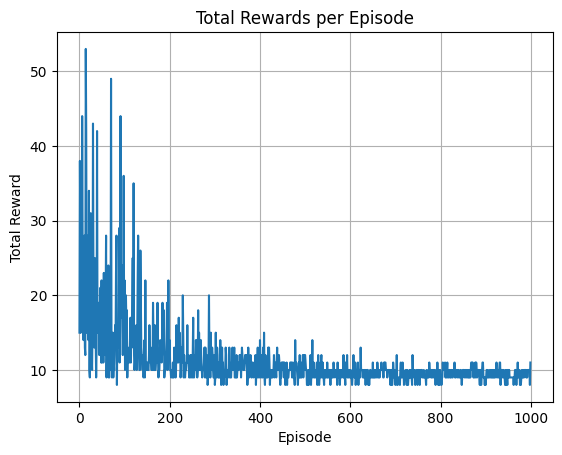

In [59]:
import matplotlib.pyplot as plt
# Visualize convergence
plt.plot(episode_rewards)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

In [62]:
# Print performance metrics
avg_reward = np.mean(episode_rewards)
max_reward = np.max(episode_rewards)
print(f"Average Total Reward: {avg_reward}")
print(f"Maximum Total Reward: {max_reward}")

Average Total Reward: 11.236
Maximum Total Reward: 53.0
